<a href="https://colab.research.google.com/github/AngelaMarin/M-todos-num-ricos-/blob/main/Polinomio_osculante_de_Hermite_con_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [5]:
#Definimos la función para calcular el polinomio de Hermite
def PIH(x,f,df):
  n=len(x)
  p=sp.symbols('X')
  polinomio=0

  for i in range(n):
    prod=1
    for j in range(n):
      if i!=j:
        prod*=(p-x[j])/(x[i]-x[j])
    polinomio+=f[i]*prod
    #Notemos que lo anterior es el polinomio de Lagrange, necesitamos la paret de las derivadas
    for j in range(n):
      if i!=j:
        prod_der=1
        for k in range(n):
          if k!=i and k!=j:
            prod_der*=(p-x[k])/(x[i]-x[k])
        polinomio+=df[i]*(p-x[j])*prod_der
  return polinomio


In [6]:
#Damos los valores para calcular la osculación:
x=np.array([1.3,1.6,1.9])
f=np.array([0.6200860,0.4554022,0.2818186])
df=np.array([-0.5220232,-0.5698959,-0.5811571])

polinomio=PIH(x,f, df)
print("El polinomio osculante de Hermite para los datos dados es:",polinomio)

El polinomio osculante de Hermite para los datos dados es: (0.74086467 - 0.5698959*X)*(6.33333333333334 - 3.33333333333334*X) + (0.75550423 - 0.5811571*X)*(3.33333333333334*X - 5.33333333333334) + (0.83523712 - 0.5220232*X)*(3.16666666666667 - 1.66666666666667*X) + (0.92985136 - 0.5811571*X)*(1.66666666666667*X - 2.16666666666667) + (0.99184408 - 0.5220232*X)*(5.33333333333333 - 3.33333333333333*X) + (1.08280221 - 0.5698959*X)*(3.33333333333333*X - 4.33333333333333) + 0.620086*(3.16666666666667 - 1.66666666666667*X)*(5.33333333333333 - 3.33333333333333*X) + 0.4554022*(6.33333333333334 - 3.33333333333334*X)*(3.33333333333333*X - 4.33333333333333) + 0.2818186*(1.66666666666667*X - 2.16666666666667)*(3.33333333333334*X - 5.33333333333334)


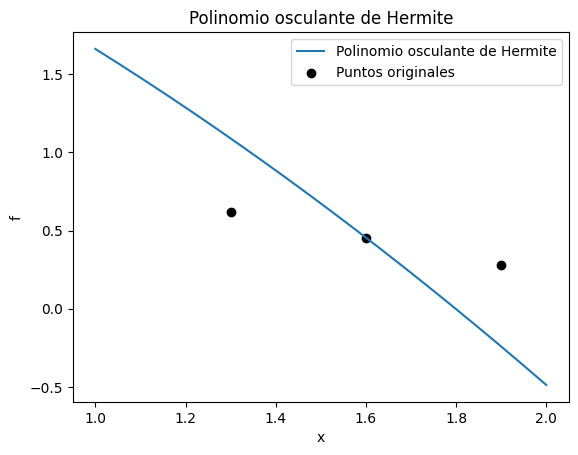

In [9]:
#Graficamos
p=sp.symbols('X')
y=sp.lambdify(p,polinomio,'numpy')
x_values=np.linspace(1,2,20)
y_values=y(x_values)

plt.plot(x_values, y_values, label='Polinomio osculante de Hermite')
plt.scatter(x,f, color='black', label='Puntos originales')
plt.xlabel('x')
plt.ylabel('f')
plt.title('Polinomio osculante de Hermite')
plt.legend()
plt.show()